In [10]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

In [12]:
"""
Examples: 
c This is an example DIMACS CNF file with 3 satisfying assignments: 1 -2 3, -1 -2 -3, 1 2 -3.
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0

(¬𝑥1∨¬𝑥2∨¬𝑥3)∧(𝑥1∨¬𝑥2∨𝑥3)∧(𝑥1∨𝑥2∨¬𝑥3)∧(𝑥1∨¬𝑥2∨¬𝑥3)∧(¬𝑥1∨𝑥2∨𝑥3) 
"""

input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

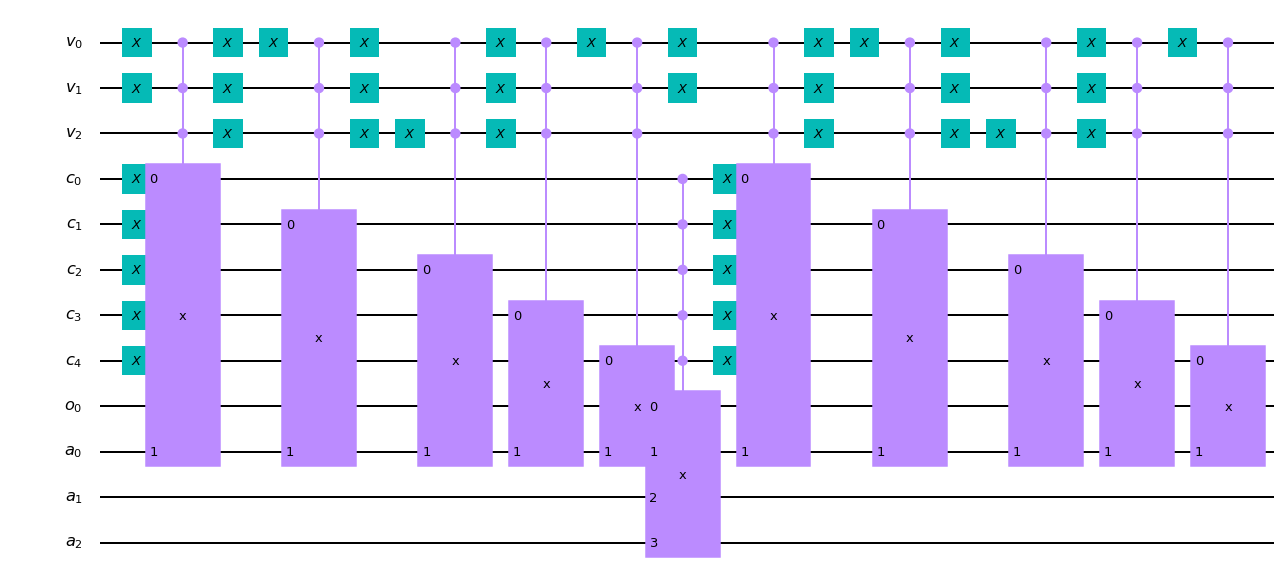

In [13]:
oracle = LogicalExpressionOracle(input_3sat)
oracle.circuit.draw('mpl')

In [14]:
grover = Grover(oracle)

In [32]:
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['result'])

## Non deterministic solutions, could be [1,-2,3], [-1, -2, -3], [1,2,-3]

[1, 2, -3]


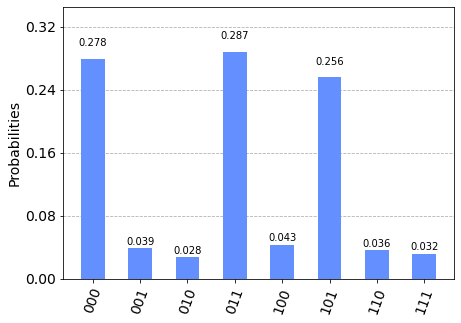

In [33]:
plot_histogram(result['measurement'])

In [34]:
## REAL DEVICE LIMITATIONS

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_16_melbourne')

In [36]:
from qiskit.compiler import transpile

# transpile the circuit for ibmq_16_melbourne
grover_compiled = transpile(result['circuit'], backend=backend, optimization_level=3)

print('gates = ', grover_compiled.count_ops())
print('depth = ', grover_compiled.depth())

gates =  OrderedDict([('cx', 435), ('u2', 116), ('u1', 95), ('u3', 64), ('measure', 3), ('barrier', 2)])
depth =  456


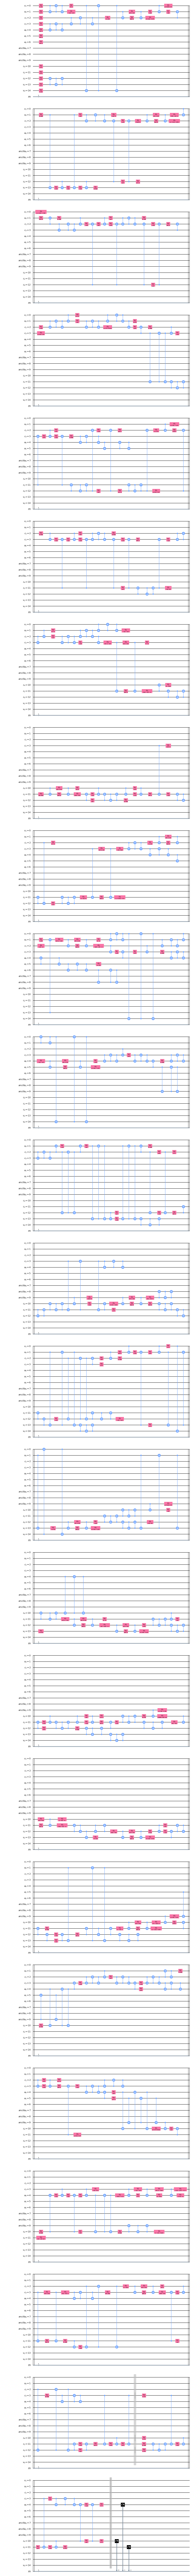

In [37]:
grover_compiled.draw('mpl')

In [40]:
from qiskit import execute
from qiskit.tools.monitor import job_monitor

job_exp = execute(grover_compiled, shots=1024, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


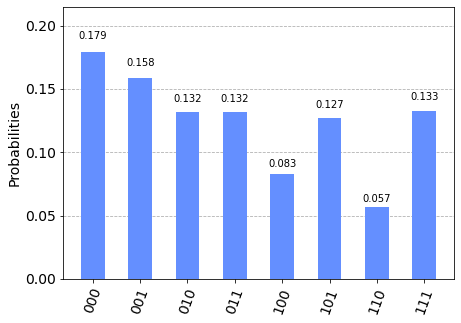

In [41]:
# Get the results from the computation
results = job_exp.result()
answer = results.get_counts(grover_compiled)
plot_histogram(answer)
# Too much noise!